### Image Segmentation and IOU Calculation

Step-1: Importing Libraries.

Step-2 : Loading and Parsing the XML File.

Step-3 : Extracting the Image.

         Retrieve the filename of the image from the XML data and construct the full path.

Step-4 : Loading and Converting the Image.

         Read the image using OpenCV and convert it from BGR to RGB format.

Step-5 : Displaying and annotating the Image with Bounding Boxes and Labels.

         Loop through each object in the XML.
         Retrieve the object's name and bounding box coordinates.
         Create and add a rectangle for the bounding box.
         Add a text label for the object's name.
         
Step-6 : Displaying the segmented image with Bounding Boxes and Labels.

Step-7 : Generate Ground Truth Mask and Predicted Mask from the segmentation image.
            
         create a binary mask where pixels matching the color are set to 1 (white) and all other pixels are set to 0 (black).
         For each ground truth mask, apply erosion followed by dilation (mimicking potential inaccuracies in predictions).

Step-8 : Calculate IOU between Ground Truth Mask and Predicted Mask.

         IoU is calculated by dividing the number of intersecting pixels by the number of union pixels between Ground Truth Mask and Predicted Mask.


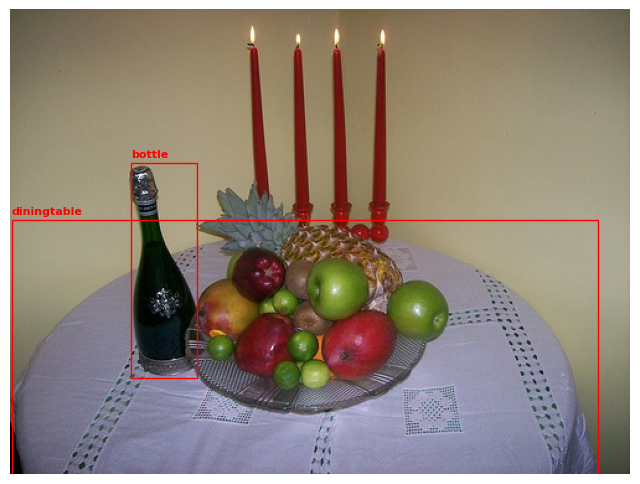

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from xml.etree import ElementTree as ET


xml_file = "Pascal_VOC/Annotation/2007_000250.xml"
tree = ET.parse(xml_file)
root = tree.getroot()

image_filename = root.find('filename').text
image_filename = "Pascal_VOC/Image/" + image_filename

image = cv2.imread(image_filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image)


for obj in root.findall('object'):
    name = obj.find('name').text
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)

    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin - 5, name, color='r', fontsize=8, fontweight='bold')

plt.axis('off')
plt.show()


Now plot the segmentation image of the corresponding image and draw the bounding boxes on it.

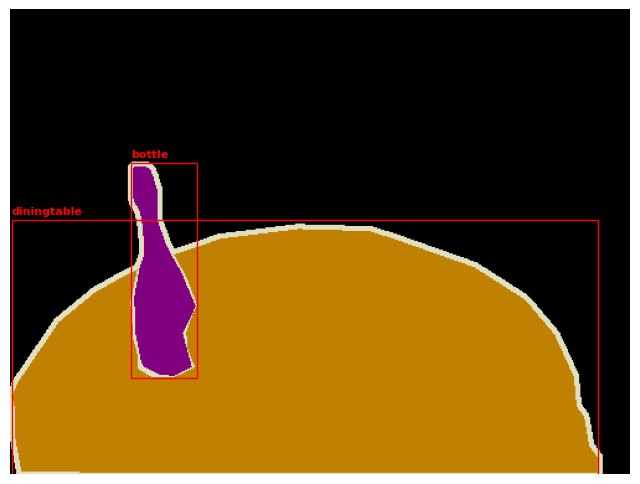

In [2]:
image_filename = "Pascal_VOC/segmentation/2007_000250.png"

image = cv2.imread(image_filename)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(image)

for obj in root.findall('object'):
    name = obj.find('name').text
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)

    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(xmin, ymin - 5, name, color='r', fontsize=8, fontweight='bold')

plt.axis('off')
plt.show()



###### generate_binary_masks(segmented_image, class_colors)
        generate binary masks for each class in a segmented image.

###### generate_predicted_masks(ground_truth_masks)
        generate predicted masks by applying morphological transformations to ground truth masks.

###### calculate_iou(gt_mask, pred_mask)
        calculate the Intersection over Union (IoU) score between a ground truth mask and a predicted mask.

In [3]:
def generate_binary_masks(segmented_image, class_colors):
    masks = []
    for color in class_colors:
        mask = cv2.inRange(segmented_image, color, color)
        masks.append(mask)
    return masks

def generate_predicted_masks(ground_truth_masks):
    predicted_masks = []
    kernel = np.ones((30, 30), np.uint8)
    for gt_mask in ground_truth_masks:
        eroded_mask = cv2.erode(gt_mask, kernel, iterations=1)
        dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)
        predicted_masks.append(dilated_mask)
    return predicted_masks

def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou


In [4]:
segmented_image = cv2.imread('Pascal_VOC/segmentation/2007_000250.png')  
class_colors = [(0, 128, 192), (128, 0, 128)] #(colors from segmented image(yellow and purple) in bgr format)

In [5]:
ground_truth_masks = generate_binary_masks(segmented_image, class_colors)

predicted_masks = generate_predicted_masks(ground_truth_masks)

#### Plotting the ground truth mask for each class separately

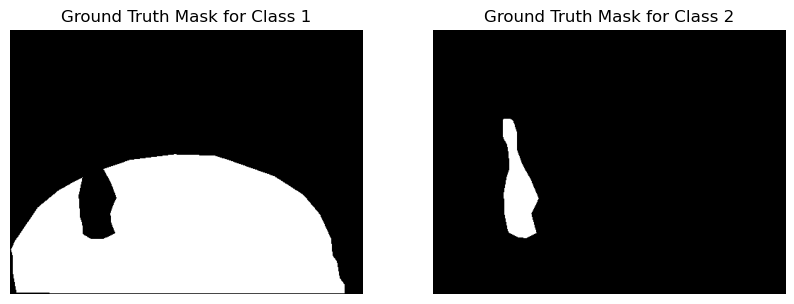

In [6]:
fig, axs = plt.subplots(1, len(ground_truth_masks), figsize=(10, 5))
for i, gt_mask in enumerate(ground_truth_masks):
    axs[i].imshow(gt_mask, cmap='gray')
    axs[i].set_title(f'Ground Truth Mask for Class {i+1}')
    axs[i].axis('off')
plt.show()

#### Plotting the predicted mask for each class separately

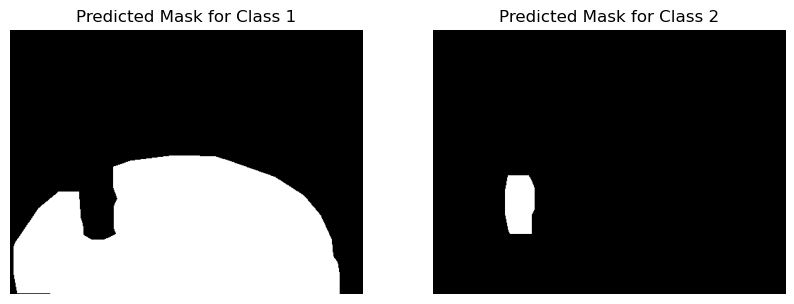

In [7]:
fig, axs = plt.subplots(1, len(predicted_masks), figsize=(10, 5))
for i, pred_mask in enumerate(predicted_masks):
    axs[i].imshow(pred_mask, cmap='gray')
    axs[i].set_title(f'Predicted Mask for Class {i+1}')
    axs[i].axis('off')
plt.show()

In [8]:
iou_scores = []
for i, gt_mask in enumerate(ground_truth_masks):
    pred_mask = predicted_masks[i]
    iou = calculate_iou(gt_mask, pred_mask)
    iou_scores.append(iou)

print("IoU for class 1:", iou_scores[0])
print("IoU for class 2:", iou_scores[1])

IoU for class 1: 0.9737124615080374
IoU for class 2: 0.6341611144760751
